# introduction to clustering
- clustering is an unsupervised machine learning technique that groups data points together based on their features.
- clustering doesn't rely on labeled data,nmaking it ideal for exploring pattern in datasets where lables are not known.

# importing the necessary libraries

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r"C:\Users\GASTO\Downloads\marketing_campaign.csv",sep='\t')# sep is a function that specifies the delimeter that separates the columns .

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [ ]:
data.isnull().sum()

there is misssingness in our income column

# solve for missingness in our Income column

median imputation as its less affected by outliers

In [6]:
imputer=SimpleImputer(strategy='median')
data['Income']=imputer.fit_transform(data[['Income']])

In [ ]:
data.dtypes

data is in form of categorical variables(object),numerical variables(intergers,float)

In [8]:
numeric_columns = data.select_dtypes(include=["int64","float64"]).columns.to_list()

# check the correlation of the data

In [9]:
correlation_matrix=data[numeric_columns].corr()
correlation_matrix

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,0.012996,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
Year_Birth,0.000028,1.000000,-0.160899,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,0.012996,-0.160899,1.000000,-0.425326,0.018965,-0.004061,0.576903,0.428791,0.577805,0.437564,...,-0.549785,-0.016064,0.182718,0.334893,0.274891,0.087581,-0.027187,NaN,NaN,0.132867
Kidhome,0.002406,0.230176,-0.425326,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.002580,-0.352111,0.018965,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.046524,-0.019871,-0.004061,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.022878,-0.157773,0.576903,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,0.004600,-0.017917,0.428791,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.004437,-0.030872,0.577805,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.024475,-0.041625,0.437564,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331


from my matrix ID shows minumum relationship with its correlation being less 

# drop the id column as it has a lower value of correlation

In [10]:
data=data.drop('ID',axis=1)

setting the dt_customer as our index

In [11]:
data.set_index("Dt_Customer",inplace=True)

# checking for outliers.
 - boxplot for visualization

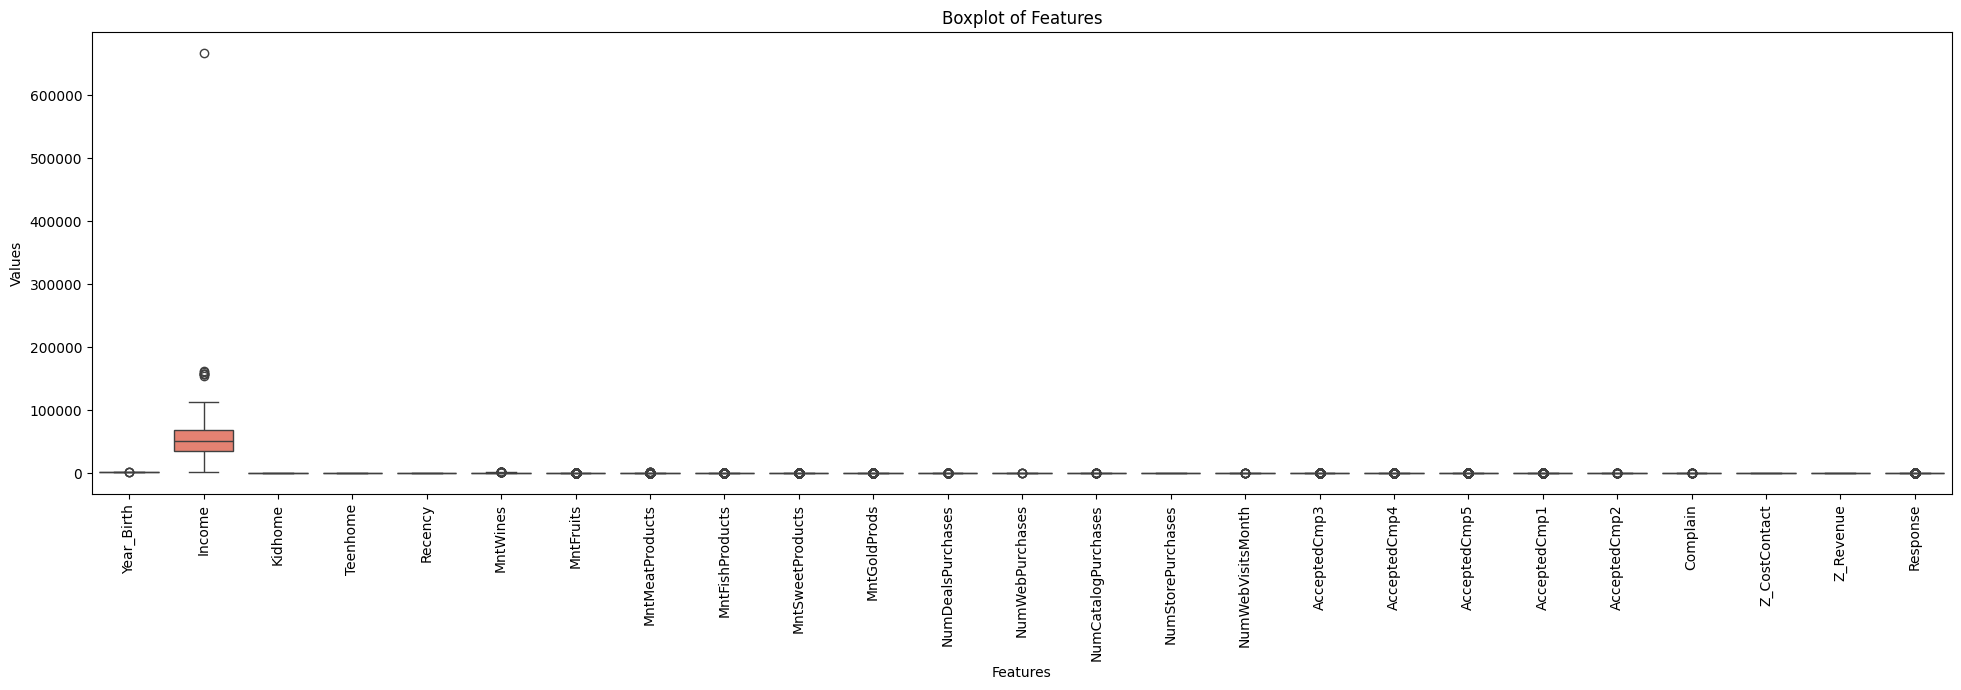

In [12]:
plt.figure(figsize=(24, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

 outliers in our data are only evident in our income column which has been caused by the missingness which we solved earlier in our data

# removing outliers on income column

In [13]:
Q1=data['Income'].quantile(0.25)
Q3=data['Income'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
filtered_data=data[(data['Income']>=lower_bound)&(data['Income']<=upper_bound)]

In [14]:
filtered_data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Dt_Customer,,,,,,,,,,,,,,,,,,,,,
2012-09-04,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
2014-03-08,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2013-08-21,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
2014-02-10,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
2014-01-19,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-06-13,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,5,0,0,0,0,0,0,3,11,0
2014-06-10,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,7,0,0,0,1,0,0,3,11,0
2014-01-25,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,6,0,1,0,0,0,0,3,11,0


# encoding the categorical variables
 - since our categorical variables that is Education and Marital_status is orderd then ordinal encoding is the best approach

In [15]:
education_levels=filtered_data['Education'].unique()
education_levels

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [16]:
marital_levels=filtered_data['Marital_Status'].unique()
marital_levels

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [17]:
correct_order_education=['Basic','2n Cycle','Graduation','Master','PhD']
correct_order_marital_status = ['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']
Ordinal_Encoder=OrdinalEncoder(categories=[correct_order_education,correct_order_marital_status])
filtered_data[['Education','Marital_Status']]=Ordinal_Encoder.fit_transform(filtered_data[['Education','Marital_Status']])


C:\Users\GASTO\AppData\Local\Temp\ipykernel_9056\3200132838.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[['Education','Marital_Status']]=Ordinal_Encoder.fit_transform(filtered_data[['Education','Marital_Status']])


In [18]:
filtered_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Dt_Customer,,,,,,,,,,,,,,,,,,,,,
2012-09-04,1957,2.0,0.0,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
2014-03-08,1954,2.0,0.0,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2013-08-21,1965,2.0,1.0,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
2014-02-10,1984,2.0,1.0,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
2014-01-19,1981,4.0,2.0,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0


# modeling

In [109]:
#x=filtered_data.drop(columns=['Income'])
#y=filtered_data['Income']

In [111]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# standardization

In [122]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)


# Reducing the dimensionality of our data 
- pca 

In [123]:
pca=PCA(n_components=0.99)
pca_data=pca.fit_transform(scaled_data)

In [124]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.27404936, 0.08558126, 0.07663518, 0.05789952, 0.04737616,
       0.04116686, 0.04060532, 0.03973096, 0.03646392, 0.0326624 ,
       0.02899301, 0.02677547, 0.02486107, 0.02434986, 0.02213921,
       0.02090936, 0.02067268, 0.01740471, 0.016018  , 0.01517551,
       0.01462224, 0.01234588, 0.01038379, 0.00771331])

In [125]:
cumsum = np.cumsum(explained_variance_ratio)

Text(0.5, 1.0, 'Cumulative Explained Variance Plot')

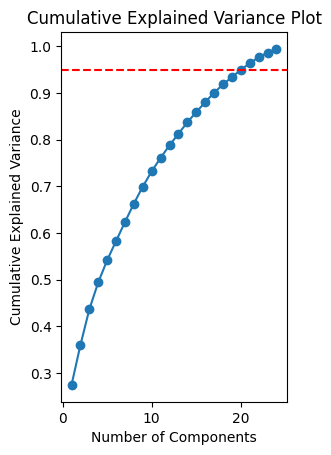

In [126]:
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumsum) + 1), cumsum, marker="o")
plt.axhline(y=0.95, color="r", linestyle="--")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance Plot")

# plotting the pca_transformed data to get the best clustering approach to use

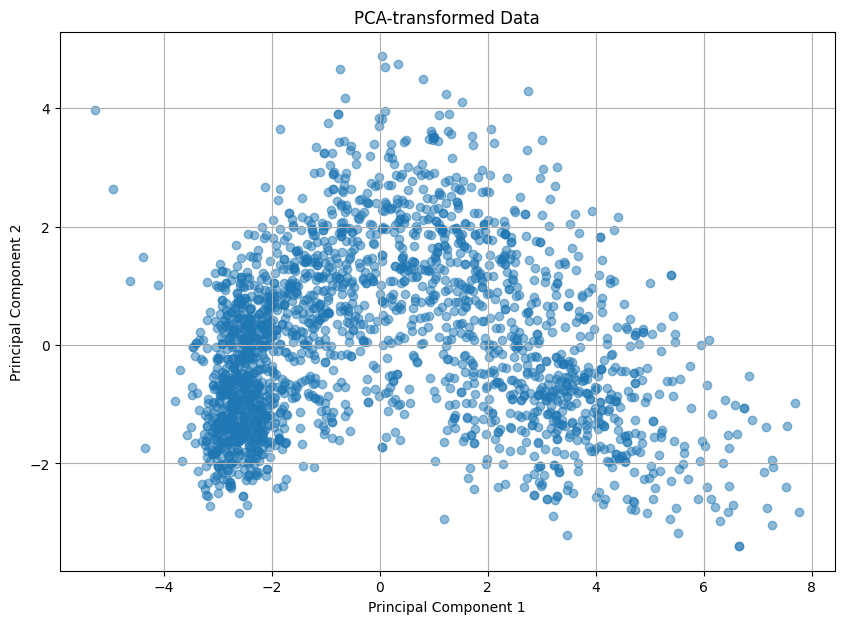

In [127]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1], marker='o', alpha=0.5)
plt.title('PCA-transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

- from our scatter plot on the pca_data it is evident that the data has meandering clusters of different shapes and densities.

- hence DBSCAN  being appropriate due to the dense and sparse regions .

- GMM  to  see how well the data fits gaussian distribution.

- Hierarchial clustering


# DBSCAN

In [129]:
dbscan = DBSCAN(eps=5, min_samples=10) 
dbscan_labels = dbscan.fit_predict(pca_data)

In [130]:
np.unique(dbscan_labels)

array([-1,  0,  1])

In [131]:
unique_labels = len(set(dbscan_labels))
print(f'Number of unique clusters found: {unique_labels}')

Number of unique clusters found: 3


In [132]:
silhouette_dbscan = silhouette_score(pca_data, dbscan_labels)
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')

Silhouette Score for DBSCAN: 0.3987252633940308


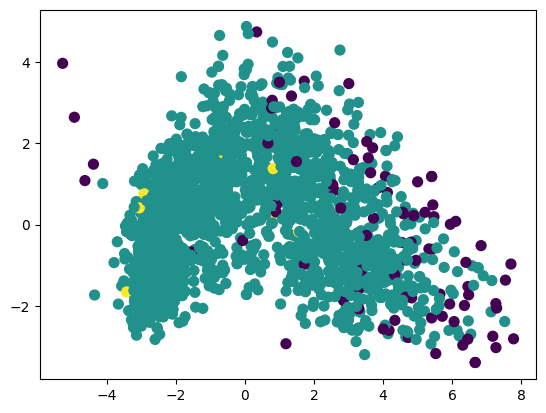

In [133]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, s=50, cmap='viridis')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_data)

# Check for clusters
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f'Estimated number of clusters: {n_clusters_dbscan}')
print(f'Estimated number of noise points: {n_noise}')

# Calculate Silhouette Score for DBSCAN
if n_clusters_dbscan > 1:
    sil_score_dbscan = silhouette_score(pca_data, dbscan_labels)
    print(f'Silhouette Score for DBSCAN: {sil_score_dbscan}')
else:
    print('Cannot compute Silhouette Score, only one cluster identified.')

# Plot the DBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='viridis', s=50, marker='o')
plt.title('DBSCAN Clustering on PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


# GMM

In [134]:
gmm = GaussianMixture(n_components=5,random_state=0)  
gmm.fit(pca_data)
Y_gmm=gmm.predict(pca_data)

In [135]:
silhouette_gmm = silhouette_score(pca_data, Y_gmm)
print(f'Silhouette Score for GMM: {silhouette_gmm}')


Silhouette Score for GMM: 0.19334903497877093


In [136]:
aic_gmm = gmm.aic(pca_data)
bic_gmm = gmm.bic(pca_data)
print(f'AIC for GMM: {aic_gmm}')
print(f'BIC for GMM: {bic_gmm}')

AIC for GMM: -10134.02699180708
BIC for GMM: -859.9259944411297


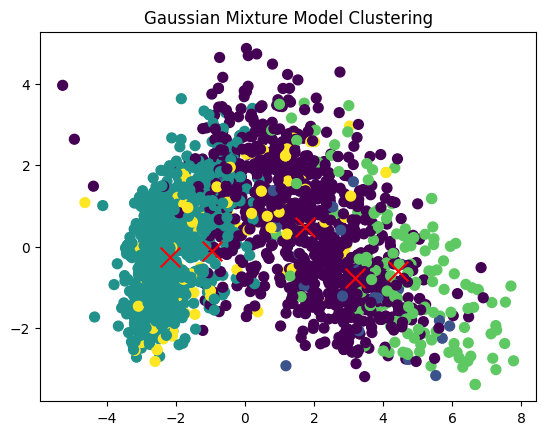

In [137]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=Y_gmm, s=50, cmap='viridis')

# Plot the cluster centers
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=200, c='red', marker='x')
plt.title('Gaussian Mixture Model Clustering')
plt.show()

# Agglomerative clustering

In [138]:
hierarchical = AgglomerativeClustering(n_clusters=3,linkage='ward')  # Adjust clusters
hierarchical_labels = hierarchical.fit_predict(pca_data)

In [36]:
silhouette_hierarchical = silhouette_score(pca_data, hierarchical_labels)
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical}')

Silhouette Score for Hierarchical Clustering: 0.2051339740738437


In [139]:
from scipy.cluster.hierarchy import dendrogram, linkage

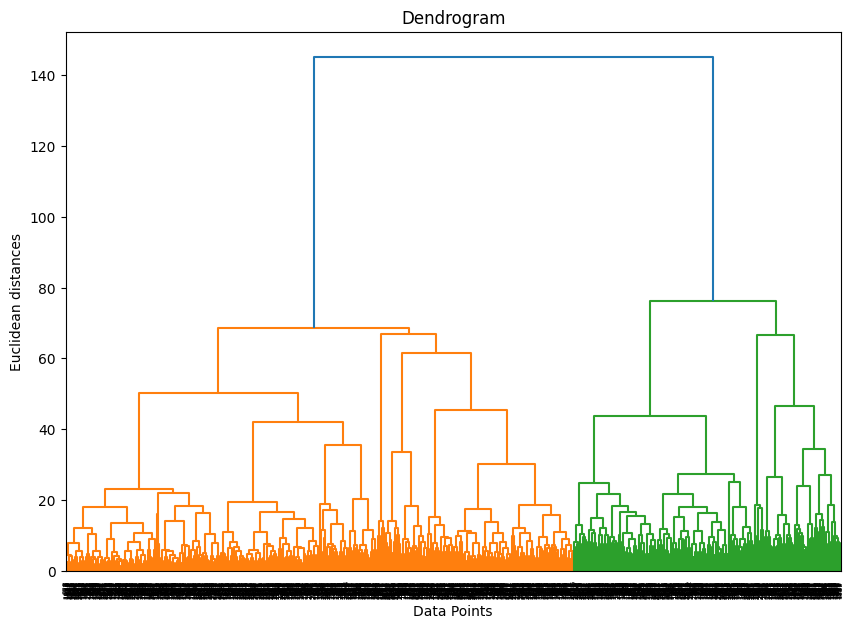

In [140]:
linked = linkage(pca_data, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean distances')
plt.show()

In [39]:
#hierarchical = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  # Adjust clusters
hierarchical_labels = hierarchical.fit_predict(pca_data)